## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Salary_Data.csv")

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [13]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## 1. Fitting (Simple) Linear Regression model on data now

$$ \Large y = h_0+h_1x_1$$

In [2]:
from sklearn.linear_model import LinearRegression

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_predict = regressor.predict(X_test)

In [9]:
y_test, y_predict

(array([  37731.,  122391.,   57081.,   63218.,  116969.,  109431.,
         112635.,   55794.,   83088.,  101302.]),
 array([  40835.10590871,  123079.39940819,   65134.55626083,
          63265.36777221,  115602.64545369,  108125.8914992 ,
         116537.23969801,   64199.96201652,   76349.68719258,
         100649.1375447 ]))

In [10]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="cyan")

In [11]:
plt.title("Experiance vs Salary (Training Data)")
plt.xlabel("Experiance")
plt.ylabel("Salary")

Text(0,0.5,'Salary')

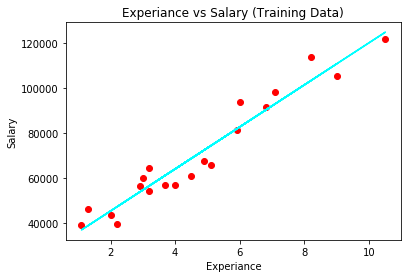

In [12]:
plt.show()

In [13]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "cyan")

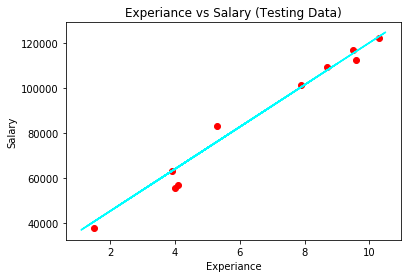

In [14]:
plt.title("Experiance vs Salary (Testing Data)")
plt.xlabel("Experiance")
plt.ylabel("Salary")
plt.show()

## 2. Fitting (Multiple) Linear Regression Model on data now

$$ \Large y = h_0+h_1x_1+h_2x_2+h_3x_3+\ldots+h_nx_n $$

In [16]:
dataset = pd.read_csv("50_Startups.csv")

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [19]:
le_X = LabelEncoder()

In [20]:
X[: ,3] = le_X.fit_transform(X[:, 3])

In [21]:
onehotenc = OneHotEncoder(categorical_features=[3])

In [22]:
X = onehotenc.fit_transform(X).toarray()

In [23]:
X = X[: ,1:]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [25]:
regressor = LinearRegression()

In [26]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y_pred = regressor.predict(X_test)

In [28]:
y_pred, y_test

(array([ 103015.20159796,  132582.27760815,  132447.73845175,
          71976.09851258,  178537.48221056,  116161.24230166,
          67851.69209676,   98791.73374687,  113969.43533013,
         167921.06569551]),
 array([ 103282.38,  144259.4 ,  146121.95,   77798.83,  191050.39,
         105008.31,   81229.06,   97483.56,  110352.25,  166187.94]))

## 3. Fitting Step Regression (Backward Elimination) Model on data now

In [29]:
import statsmodels.formula.api as sm

In [33]:
X = np.append(np.ones((50,1)).astype(int), X, 1)

In [60]:
X_opt = X[: ,[0, 3]]

In [61]:
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 18 Jan 2018   Prob (F-statistic):           3.50e-32
Time:                        16:51:23   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4. Fitting Polynomial Regression Model on data now

$$ \Large y = h_0+h_1x_1+h_2x_1^2+h_3x_1^3+\ldots+h_nx_1^n $$

In [64]:
dataset = pd.read_csv("Position_Salaries.csv")

In [124]:
X = dataset.iloc[: ,1:2].values
y = dataset.iloc[: ,2].values
X.shape, y.shape

((10, 1), (10,))

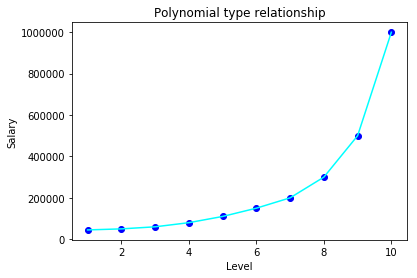

In [129]:
plt.scatter(X, y, color="blue")
plt.plot(X[:, -1], y, color="cyan")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Polynomial type relationship")
plt.show()

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [136]:
reg_lin = LinearRegression()
reg_poly = PolynomialFeatures()

In [137]:
reg_lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
X_poly = reg_poly.fit_transform(X)
reg_2 = LinearRegression()

In [142]:
reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

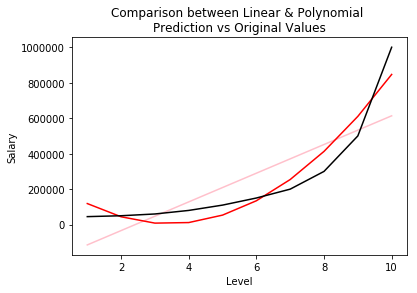

In [174]:
plt.plot(X, reg_lin.predict(X), color="pink")
plt.plot(X, reg_2.predict(X_poly), color="red")
plt.plot(X, y, color="black")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Comparison between Linear & Polynomial \nPrediction vs Original Values")
plt.show()